# HMS 581 Quiz

## Code to accompany Question 1:
### Calculate Eigenvalues

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.array([[.5, .25], [.5, -.125]])

eige_vals, eig_vecs = np.linalg.eig(A)
eige_vals

array([ 0.65936465, -0.28436465])

In [3]:
eig_vecs

array([[ 0.84324302, -0.3036773 ],
       [ 0.53753252,  0.95277495]])

In [4]:
# Esnsure which eigenvalue corresponds to which eigenvector
tol = 1e-16
assert (A@eig_vecs[:,0] - eige_vals[0]*eig_vecs[:,0] < tol).all()
assert (A@eig_vecs[:,1] - eige_vals[1]*eig_vecs[:,1] < tol).all()

In [5]:
v1 = eig_vecs[:, 0]
v1

array([0.84324302, 0.53753252])

In [6]:
x = np.array([1, 1])
x_hat = x / np.linalg.norm(x)

y = A@x
y_hat = y / np.linalg.norm(y)

x_hat, y_hat

(array([0.70710678, 0.70710678]), array([0.89442719, 0.4472136 ]))

In [7]:
quantity_1 = np.linalg.norm(x_hat - v1)
quantity_2 = np.linalg.norm(y_hat - v1)

## Code to accompany Question 3:

In [8]:
def gamblers_room(x, p):
    """
    Run a round of the gamblers room game.

    :param x: The current balance of the player.
    :param p: The probability of winning a bet.

    :return: The new balance after the round.
    """
    x = x - 1
    if np.random.uniform(0, 1) < p:
        x = x + 2
    return x


def run_game(
    balance: int,
    goal_winnings: int,
    p: float = 0.5,
    max_iter: int = 1000,
) -> np.array:
    """
    Simulate a game of gambling in the gambler's room.

    :param initial_balance: The initial balance of the player.
    :param goal_winnings: The goal winnings of the player.
    :param p: The probability of winning a bet.
    :param max_iter: The maximum number of iterations to simulate.

    :return: A numpy array containing the balances during the game.
    """
    balances_during_game = [balance]
    prev_balance = balance
    for i in range(max_iter):
        balance = gamblers_room(prev_balance, p)
        balances_during_game.append(balance)
        if balance == 0:
            break
        elif balance >= goal_winnings:
            break
        prev_balance = balance
    return np.array(balances_during_game)


def simulate_games(
    balance: int,
    goal_winnings: int,
    num_simulations: int,
    p: float = 0.5,
) -> list[tuple[int, int]]:
    """
    Simulate multiple games of gambling in the gambler's room.

    :param initial_balance: The initial balance of the player.
    :param goal_winnings: The goal winnings of the player.
    :param num_simulations: The number of simulations to run.
    :param p: The probability of winning a bet.

    :return: A list of tuples containing the results of each simulation.
    """
    sim_results = []
    for i in range(num_simulations):
        results = run_game(balance, goal_winnings, p)
        sim_results.append(results)
    
    return sim_results

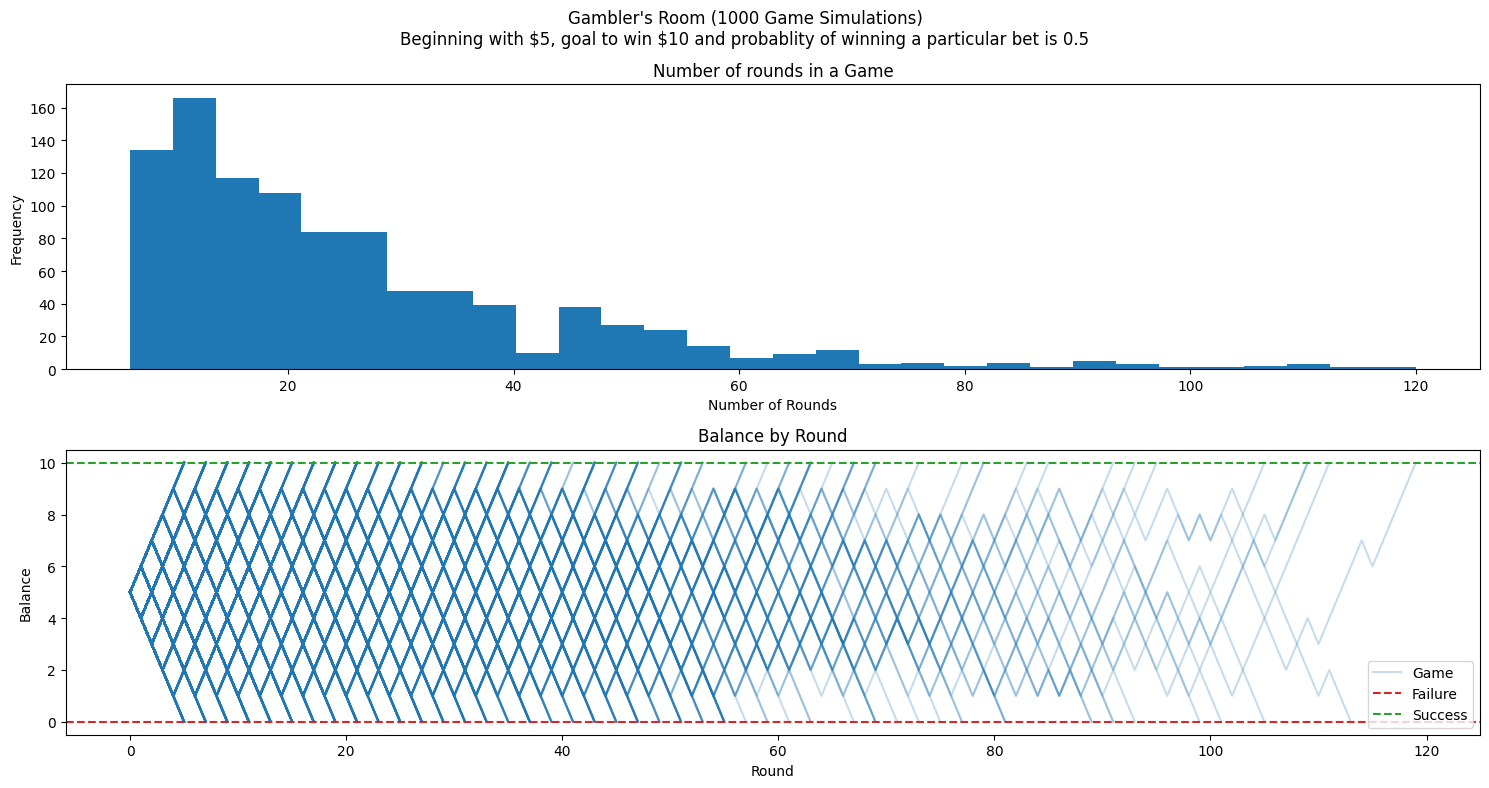

In [9]:
sim_results = simulate_games(
    balance=5,
    goal_winnings=10,
    num_simulations=1000,
    p=0.5,
)

fig, ax = plt.subplots(2, 1, figsize=(15, 8))

ax[0].hist(
    [len(game) for game in sim_results],
    bins=30,
    color='tab:blue',
)
ax[0].set_title("Number of rounds in a Game")
ax[0].set_xlabel("Number of Rounds")
ax[0].set_ylabel("Frequency")

for i, game in enumerate(sim_results):
    if i == 0: 
        ax[1].plot(game, 'tab:blue', alpha=0.25, label='Game')
    else:
        ax[1].plot(game, 'tab:blue', alpha=0.25)

ax[1].set_title("Balance by Round")
ax[1].set_xlabel("Round")
ax[1].set_ylabel("Balance")
ax[1].axhline(y=0, color='tab:red', linestyle='--', label='Failure')
ax[1].axhline(y=10, color='tab:green', linestyle='--', label='Success')
ax[1].legend()

plt.suptitle("Gambler's Room (1000 Game Simulations)\nBeginning with \$5, goal to win \$10 and probablity of winning a particular bet is 0.5")
plt.tight_layout()
plt.savefig("visualizations/balance_by_round_and_histogram.png", dpi=300)
plt.show()

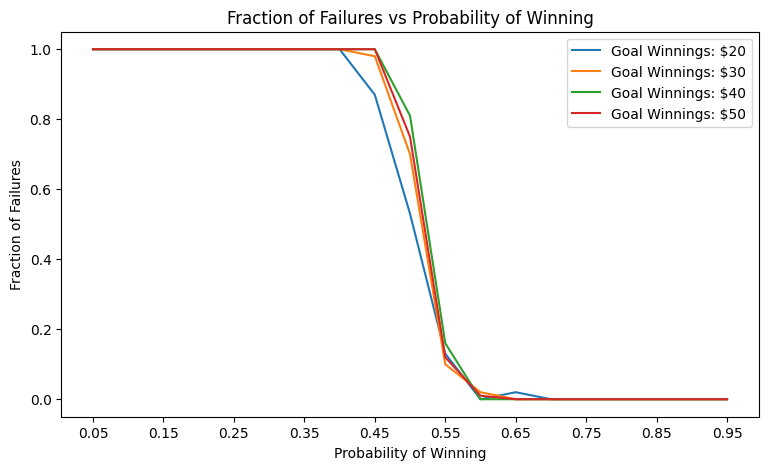

In [10]:
# TODO run this for each value of goal winnings 20, 30, 40 and 50
# TODO plot the 4 different curves on the same plot
DEFUALT_PROBABILITIES = np.arange(0.05, 1.0, .05)

def calculate_fraction_of_failures(
    balance: int,
    goal_winnings: int,
    num_simulations: int = 100,
    probabilities: list[float] = DEFUALT_PROBABILITIES,
) -> float:
    """
    Calculate the fraction of failures in multiple games of gambling in the gambler's room.

    :param initial_balance: The initial balance of the player.
    :param goal_winnings: The goal winnings of the player.
    :param num_simulations: The number of simulations to run.
    :param p: The probability of winning a bet.

    :return: The fraction of failures in the simulations.
    """
    fraction_of_failures_list = []

    for prob in probabilities:
        sim_results = simulate_games(balance, goal_winnings, num_simulations, prob)
        fraction_of_failures = sum([game[-1] == 0 for game in sim_results]) / len(sim_results)
        fraction_of_failures_list.append(fraction_of_failures)

    return fraction_of_failures_list

fig, ax = plt.subplots(figsize=(9, 5))

for goal_winnings in [20, 30, 40, 50]:
    fraction_of_failures_list = calculate_fraction_of_failures(
        balance=10,
        goal_winnings=goal_winnings,
    )
    ax.plot(DEFUALT_PROBABILITIES, fraction_of_failures_list, label=f"Goal Winnings: \${goal_winnings}")
    ax.set_title("Fraction of Failures vs Probability of Winning")
    ax.set_xlabel("Probability of Winning")
    ax.set_ylabel("Fraction of Failures")
    ax.set_xticks(DEFUALT_PROBABILITIES[::2])

ax.legend()
plt.savefig("visualizations/fraction_of_failures_vs_probability.png", dpi=300)
plt.show()